In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

file_path = '/content/drive/My Drive/creditcard.csv'
dataFrame = pd.read_csv(file_path)


# Prepare data
X = dataFrame.drop('Class', axis=1)
y = dataFrame['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Initialize and fit the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = decision_tree.predict(X_test)
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Initialize and fit the model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict and evaluate
y_pred = lda.predict(X_test)
print("Linear Discriminant Analysis (LDA):")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Initialize and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Initialize and fit the model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predict and evaluate
y_pred = naive_bayes.predict(X_test)
print("Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))



Logistic Regression:
Accuracy: 0.9991748885221726
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Decision Tree Classifier:
Accuracy: 0.9990344440153085
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.74      0.73        98

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Linear Discriminant Analysis (LDA):
Accuracy: 0.9993679997191109
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.81      0.81        98

    accuracy

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


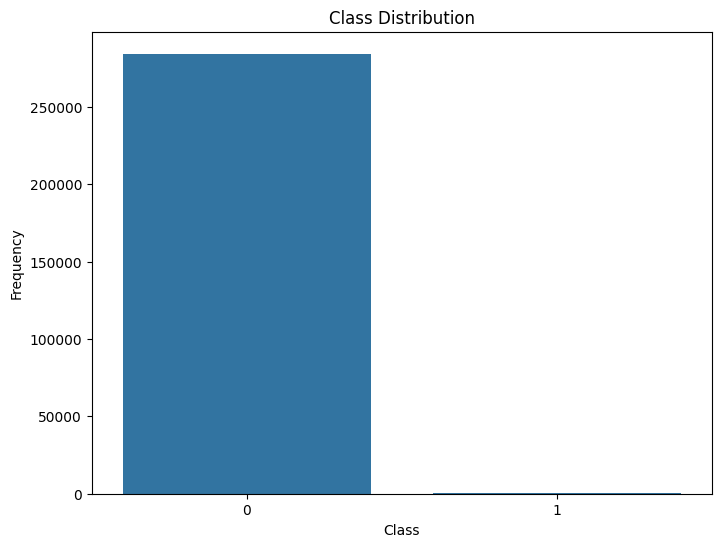

Selected Features with Logistic Regression: Index(['V4', 'V8', 'V9', 'V10', 'V12', 'V13', 'V14', 'V16', 'V21', 'V22'], dtype='object')

One-Class SVM Performance Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962

ROC-AUC: 0.0860
PR-AUC: 0.0016


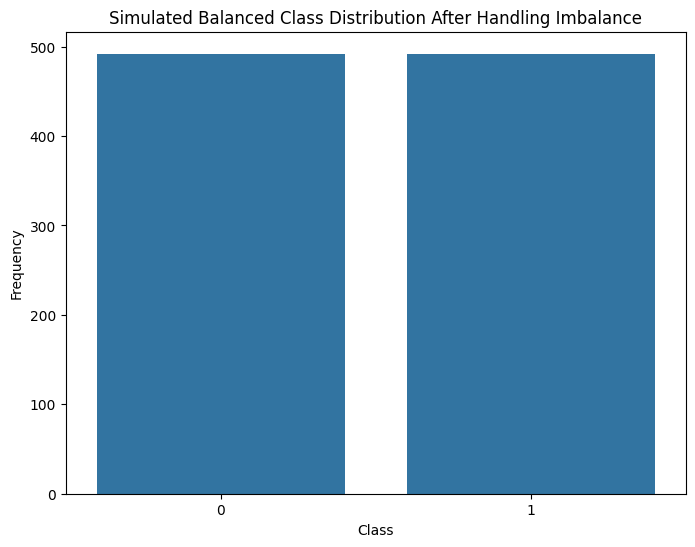

In [5]:

from sklearn.svm import OneClassSVM
# Check class distribution
class_distribution = dataFrame['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=dataFrame)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Prepare data
X = dataFrame.drop('Class', axis=1)
y = dataFrame['Class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Feature Selection using RFE with Logistic Regression
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("Selected Features with Logistic Regression:", selected_features)

# Prepare the dataset with selected features
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]

# Define the one-class classifier
oc_svm = OneClassSVM(gamma='auto', nu=0.1)

# Train One-Class SVM on the majority class (assumed to be '0')
X_train_majority = X_train_selected[y_train == 0]
oc_svm.fit(X_train_majority)

# Predict on the test set
y_pred = oc_svm.predict(X_test_selected)
# Convert predictions from {-1, 1} to {0, 1}
y_pred = np.where(y_pred == -1, 1, 0)

# Evaluate performance
print("\nOne-Class SVM Performance Report:")
print(classification_report(y_test, y_pred))

# Compute and print ROC-AUC and PR-AUC
# For ROC-AUC and PR-AUC, we need probability estimates or decision function scores.
# Since One-Class SVM does not provide probabilities directly, we'll use decision function scores for this.
y_pred_proba = oc_svm.decision_function(X_test_selected)
# Transform decision function scores to probabilities
y_pred_proba = np.clip(y_pred_proba, a_min=0, a_max=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.4f}")

pr_auc = average_precision_score(y_test, y_pred_proba)
print(f"PR-AUC: {pr_auc:.4f}")

# Simulate balanced class distribution based on class_weight='balanced'
class_counts = y.value_counts()
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()
simulated_balanced_distribution = {
    majority_class: class_counts[majority_class] * (class_counts[minority_class] / class_counts[majority_class]),
    minority_class: class_counts[minority_class]
}

# Visualize simulated balanced class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=list(simulated_balanced_distribution.keys()), y=list(simulated_balanced_distribution.values()))
plt.title('Simulated Balanced Class Distribution After Handling Imbalance')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


# Save predictions and actual labels to compare
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('/content/drive/My Drive/Cancer_Data_One_Class_Learning.csv', index=False)
